## Модуль А.  Парсинг и предобработка данных

### Введение

нана

#### Импортирование библиотек

In [1]:
from bs4 import BeautifulSoup as bs
import requests 
import pandas as pd
import io
import glob
import re
import nltk
import matplotlib.pyplot as plt
import pymorphy2
import fitz
import string
import re
from nltk.stem import *
from nltk.corpus import stopwords
from pymystem3 import Mystem
from string import punctuation
from nltk.tokenize import word_tokenize
from tqdm.auto import tqdm, trange

#### Установка библиотек

In [2]:
pip install pymystem3

In [3]:
pip install fitz

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install PyMuPDF

Note: you may need to restart the kernel to use updated packages.


### 1.1 Парсинг данных

In [5]:
# создание списка для дальнейшей записи в него данных и преобразования в DataFrame
df = {"TitleCompany" : [],"DescriptionCompany" : [], "ReitingCompany" : [],"CategoriesCompany" : [],"TitleTextPosts" : []}

In [6]:
# выводим общую информацию о пдф файле
pdf_document = r"C:\Users\essww\OneDrive\Рабочий стол\Компании.pdf"
doc = fitz.open(pdf_document)
print("Исходный документ: ", doc)
print("\nКоличество страниц: %i\n\n------------------\n\n" % doc.page_count)
print(doc.metadata)
text_pages = ""
for current_page in range(len(doc)):
    page = doc.load_page(current_page)
    page_text = page.get_text("text")
    # записываем текст пдф файла
    text_pages += page.get_text("text")
    print("Стр. ", current_page+1, "\n")
    print(page_text)# выводим общую информацию о пдф файле

Исходный документ:  Document('C:\Users\essww\OneDrive\Рабочий стол\Компании.pdf')

Количество страниц: 6

------------------


{'format': 'PDF 1.7', 'title': 'Aspose', 'author': 'Aspose', 'subject': 'Aspose', 'keywords': '', 'creator': 'Aspose Pty Ltd.', 'producer': 'Aspose.PDF for .NET 23.2.0', 'creationDate': "D:20230322184058+00'00'", 'modDate': "D:20230322184137+00'00'", 'trapped': '', 'encryption': None}
Стр.  1 

RUVDS.com
VDS/VPS-хостинг. Скидка 15% по коду HABR15
Пишет в хабы:  Читальный зал,�DIY или Сделай сам,�Научно-популярное,�
Электроника для начинающих,�Системное администрирование
2393.91
72K
Selectel
IT-инфраструктура для бизнеса
Пишет в хабы:  Компьютерное железо,�Гаджеты,�IT-инфраструктура,�
IT-компании,�Производство и разработка электроники
1935.27
40K
Timeweb Cloud
Облачная платформа для разработчиков и бизнеса
Пишет в хабы:  Читальный зал,�Научно-популярное,�JavaScript,�
DIY или Сделай сам,�История IT
1542.55
1.1K
OTUS
Цифровые навыки от ведущих экспертов
Пишет в ха

In [7]:
# Разделяем текст на строки
text_pages = text_pages.split("\n")

In [8]:
text_pages

['RUVDS.com',
 'VDS/VPS-хостинг. Скидка 15% по коду HABR15',
 'Пишет в хабы:  Читальный зал,�DIY или Сделай сам,�Научно-популярное,�',
 'Электроника для начинающих,�Системное администрирование',
 '2393.91',
 '72K',
 'Selectel',
 'IT-инфраструктура для бизнеса',
 'Пишет в хабы:  Компьютерное железо,�Гаджеты,�IT-инфраструктура,�',
 'IT-компании,�Производство и разработка электроники',
 '1935.27',
 '40K',
 'Timeweb Cloud',
 'Облачная платформа для разработчиков и бизнеса',
 'Пишет в хабы:  Читальный зал,�Научно-популярное,�JavaScript,�',
 'DIY или Сделай сам,�История IT',
 '1542.55',
 '1.1K',
 'OTUS',
 'Цифровые навыки от ведущих экспертов',
 'Пишет в хабы:  Программирование,�Java,�Машинное обучение,�',
 'Тестирование веб-сервисов,�Python',
 '832.56',
 '103K',
 'Яндекс',
 'Как мы делаем Яндекс',
 'Добавить компанию',
 'Все потоки',
 'СТАТЬИ',
 '+64',
 'НОВОСТИ',
 '+50',
 'ХАБЫ',
 'АВТОРЫ',
 'КОМПАНИИ',
 'Название ',
 'Рейтинг ',
 'Подписчики',
 'КАК СТАТЬ АВТОРОМ',
 'Пишет в хабы:  Машинн

In [9]:
# Выполняем проверку на 6 индексе, т.к. на каждом 6 индексе находится нужное название компании
for i in range(0,len(text_pages),6):
    print(text_pages[i])
for i in range(len(text_pages)):
    print(i, text_pages[i])

RUVDS.com
Selectel
Timeweb Cloud
OTUS
Яндекс
НОВОСТИ
Рейтинг 
164K
9.6K
54K
167K
953
353
24K
58K
519
24K
76K
28K
40K
14K
41K
47K
Ваш
Все
Hardware
Mass media
E-commerce
Producing multimedia content
Search Engines
Games and entertainment
Публикации
Устройство сайта
Корпоративный блог
Мегапроекты
0 RUVDS.com
1 VDS/VPS-хостинг. Скидка 15% по коду HABR15
2 Пишет в хабы:  Читальный зал,�DIY или Сделай сам,�Научно-популярное,�
3 Электроника для начинающих,�Системное администрирование
4 2393.91
5 72K
6 Selectel
7 IT-инфраструктура для бизнеса
8 Пишет в хабы:  Компьютерное железо,�Гаджеты,�IT-инфраструктура,�
9 IT-компании,�Производство и разработка электроники
10 1935.27
11 40K
12 Timeweb Cloud
13 Облачная платформа для разработчиков и бизнеса
14 Пишет в хабы:  Читальный зал,�Научно-популярное,�JavaScript,�
15 DIY или Сделай сам,�История IT
16 1542.55
17 1.1K
18 OTUS
19 Цифровые навыки от ведущих экспертов
20 Пишет в хабы:  Программирование,�Java,�Машинное обучение,�
21 Тестирование веб-сервис

In [10]:
# создаем DataFrame
df = pd.DataFrame({"TitleCompany": [], "Description": [], "Reiting": [], "Categories": []})

In [11]:
TitleCompany = []
Description = []
Reiting = []
Categories = []

In [12]:
# т.к. начиная с 26 по 39 индекса, и с 132 до коннца начинается ненужная информация, мы ее удаляем
text_new_pages = text_pages[0:26] + text_pages[39:132]
for i in tqdm(range(0,len(text_new_pages),6)):
    TitleCompany.append(text_new_pages[i])
    Description.append(text_new_pages[i+1])
    Reiting.append(text_new_pages[i+4])
    Categories.append(text_new_pages[i+3].replace('�', ' '))

  0%|          | 0/20 [00:00<?, ?it/s]

In [13]:
# Запись данных в df
df["TitleCompany"] = TitleCompany
df["Description"] = Description
df["Reiting"] = Reiting
df["Categories"] = Categories

In [14]:
df

,TitleCompany,Description,Reiting,Categories
0,RUVDS.com,VDS/VPS-хостинг. Скидка 15% по коду HABR15,2393.91,"Электроника для начинающих, Системное админист..."
1,Selectel,IT-инфраструктура для бизнеса,1935.27,"IT-компании, Производство и разработка электро..."
2,Timeweb Cloud,Облачная платформа для разработчиков и бизнеса,1542.55,"DIY или Сделай сам, История IT"
3,OTUS,Цифровые навыки от ведущих экспертов,832.56,"Тестирование веб-сервисов, Python"
4,Яндекс,Как мы делаем Яндекс,721.53,"Высокая производительность, Программирование, ..."
5,Open Data Science,Крупнейшее русскоязычное Data Science сообщество,612.13,"Natural Language Processing, Open source, Big ..."
6,ГК ЛАНИТ,Ведущая многопрофильная группа ИТ-компаний в РФ,569.92,"Управление персоналом, Машинное обучение, Прог..."
7,VK,"Технологии, которые объединяют",536.95,Облачные сервисы
8,getmatch,"Рассказываем о том, как строить карьеру в IT",436.91,"IT-эмиграция, Урбанизм"
9,Wiren Board,Оборудование для автоматизации и мониторинга,411.66,"DIY или Сделай сам, Компьютерное железо"


### Мы переходим к парсингу, после того как получили список нужных нам компаний

In [15]:
dfHabr = {"TitleCompany": [], "Description": [], "Reiting": [], "Categories": [], "TextPost": []}

In [16]:
for i in range(len(df)):
    print(i, df['TitleCompany'][i])

0 RUVDS.com
1 Selectel
2 Timeweb Cloud
3 OTUS
4 Яндекс
5 Open Data Science
6 ГК ЛАНИТ
7 VK
8 getmatch
9 Wiren Board
10 FirstVDS
11 Конференции Олега Бунина (Онтико)
12 AGIMA
13 Альфа-Банк
14 Postgres Professional
15 Ozon Tech
16 TINKOFF
17 Хабр Карьера
18 JUG Ru Group
19 Southbridge


In [17]:
pagenum = 1
for i in tqdm(range(5)):
    url = "https://habr.com/ru/all/page" + str(pagenum) + '/'
    page = requests.get(url)
    soup = bs(page.text, 'html.parser')
    pages = soup.find_all('h2', class_='tm-title tm-title_h2')
    for i in pages:
        if 'companies' in str(i.a.get('href')):
            url = 'https://habr.com' + str(i.a.get('href'))
            page = requests.get(url)
            soup = bs(page.text, 'html.parser')
            TitleCompany = soup.find('a', class_='tm-company-snippet__title')
            for i in range(20):
                if TitleCompany.text in df['TitleCompany'][i]:
                    dfHabr["TitleCompany"].append(df['TitleCompany'][i])
                    dfHabr["Description"].append(df['Description'][i])
                    dfHabr["Reiting"].append(df['Reiting'][i])
                    dfHabr["Categories"].append(df['Categories'][i])
                    TextPost = soup.find('div', class_='tm-article-body')
                    TextPost.text.replace('\n', '')
                    TextPost.text.replace('\r', '')
                    dfHabr["TextPost"].append(TextPost.text)
    pagenum = pagenum + 1

  0%|          | 0/5 [00:00<?, ?it/s]

In [18]:
dfHabr1 = pd.DataFrame(data=dfHabr)

In [19]:
dfHabr1.head(10)

,TitleCompany,Description,Reiting,Categories,TextPost
0,RUVDS.com,VDS/VPS-хостинг. Скидка 15% по коду HABR15,2393.91,"Электроника для начинающих, Системное админист...",\r\nОбщий обзор новейшего алгоритма стеганогр...
1,Timeweb Cloud,Облачная платформа для разработчиков и бизнеса,1542.55,"DIY или Сделай сам, История IT",\r\nЭто было в студенческие годы моих родител...
2,Selectel,IT-инфраструктура для бизнеса,1935.27,"IT-компании, Производство и разработка электро...","\n\r\nИ по-другому это явление не назовешь, и..."
3,RUVDS.com,VDS/VPS-хостинг. Скидка 15% по коду HABR15,2393.91,"Электроника для начинающих, Системное админист...",\r\nЗаконы физики говорят нам обо всех возмож...
4,RUVDS.com,VDS/VPS-хостинг. Скидка 15% по коду HABR15,2393.91,"Электроника для начинающих, Системное админист...","\r\n«Если что-то существует, его уже кто-то н..."
5,Timeweb Cloud,Облачная платформа для разработчиков и бизнеса,1542.55,"DIY или Сделай сам, История IT","\n\r\nС юбилеем, дорогая Элизабет!\n\r\nДобро..."
6,Selectel,IT-инфраструктура для бизнеса,1935.27,"IT-компании, Производство и разработка электро...","\n\r\nКак и в случае мини-ПК, производители о..."
7,Southbridge,Обеспечиваем стабильную работу highload-проектов,272.35,"Карьера в IT-индустрии, Программирование",Автор делится своим опытом установки Kubernet...
8,Альфа-Банк,Лучший мобильный банк по версии Markswebb,311.6,"Машинное обучение, JavaScript, Карьера в IT-ин...",Привет! Меня зовут Татьяна Руфанова. Сегодня ...
9,RUVDS.com,VDS/VPS-хостинг. Скидка 15% по коду HABR15,2393.91,"Электроника для начинающих, Системное админист...",\r\nVue позволяет разработчикам писать более ...


### 1.2 Формирование структуры набора данных

### Описание структуры данных

Изначальные признаки: 

__TitleCompany__ - Название компании

__Description__ - Описание компании

__Reiting__ - Рейтинг компании

__Categories__ - Категории компании

__Date__ - Дата опубликования статьи (в будущем удален, как ненужный признак)

__TextPost__ - необработанный текст (в будущем удален, как ненужный признак)

Признаки в будущем:

__TitleCompany__ - Название компании

__Description__ - Описание компании

__Reiting__ - Рейтинг компании

__Categories__ - Категории компании

__TextPostLemat__ - обработанный, лематизированный текст 

__TextPostToken__ - обработанный, токенизированный и лематизированный текст (лематизирован другим способом нежели __TextPostLemat__)

__bigram__ - биграммы обработанного и лематизированного текста

__trigram__ - триграммы обработанного и лематизированного текста

__keyword__ - ключевые слова обработанного и лематизированного текста

__clustersAgglomerative__ - кластеры, образованные моделью Agglomerative

__clustersKmeans__ - кластеры, образованные моделью Kmeans

__clustersSpectral__ - кластеры, образованные моделью Spectral

### 1.3 Предварительная обработка текстовых данных  

In [20]:
#вывод необработанного текста
dfHabr1['TextPost'][0]

' \r\nОбщий обзор новейшего алгоритма стеганографии, позволяющего бесследно скрывать информацию внутри некоего контента. В статье мы разберём, на чём он основывается, для решения каких задач предназначен, какие уязвимости имеет и под какой лицензией будет распространяться.\n\r\nВ современную цифровую эпоху потребность в безопасной коммуникации стала как никогда актуальной. Независимо от того, говорим ли мы про обмен личными или рабочими сообщениями, угроза кибератак и взлома данных вызывает постоянное беспокойство. Криптография, представляющая собой технику шифрования информации с целью её защиты от несанкционированного доступа, уже давно служит в качестве способа обеспечения безопасного обмена сообщениями. Однако этот метод всё же остаётся уязвимым для атак и обнаружения, оставляя чувствительную информацию под угрозой. \n\r\nЗдесь на помощь приходит стеганография. Стеганография – это техника сокрытия чувствительной информации внутри безобидного контента, например изображения или аудио

In [21]:
morph = pymorphy2.MorphAnalyzer()

In [22]:
# метод удаления пунктуации
def remove_punctuation(text):
    return "".join([ch if ch not in string.punctuation else ' ' for ch in text])

# метод удаления чисел
def remove_numbers(text):
    return ''.join([i if not i.isdigit() else ' ' for i in text])

# метод удаления двойных пробелов
def remove_multiple_spaces(text):
	return re.sub(r'\s+', ' ', text, flags=re.I)

# метод удаления оставшихся чисел
def remove_notalpha(text):
    return ''.join([i if i.isalpha() else ' ' for i in text])

def remove_english_word(text):
    return ''.join(re.sub(r"[^а-яА-Я\s]+", "",text))

# метод удаления оставшихся символов
st = '❯\xa0'
def remove_othersymbol(text):
    return ''.join([ch if ch not in st else ' ' for ch in text])

# метод лематизации
def lemmatize(text):
    res = list()
    for word in text:
        p = morph.parse(word)[0]
        res.append(p.normal_form)

    return res

# метод токенизирования
def tokenize(text):
    t = word_tokenize(text)
    return [token for token in t if token not in russian_stopwords]

mystem = Mystem() 
# добавление стопслов
russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(['…', '«', '»', '...', 'быть', 'r', 'n', 'а', 'мы', 'с', 'для', 'ещё', 'его', 'также', 'к', 'тем', 'кто', 'чтобы', 'но', 'они', 'будут', 'так', 'где', 'один', 'он ', 'и', 'на', 'но', 'или', 'либо', 'это', 'мб', 'далее', 'дв', 'свой', 'ваш','всё', 'очень', 'её', 'ещё', 'вообще', 'наш', 'который'])

In [23]:
# обработка текста с лематизацией для токенизации
prep_text = [lemmatize(tokenize(remove_multiple_spaces(remove_notalpha(remove_othersymbol(remove_english_word(remove_numbers(remove_punctuation(text.lower())))))))) for text in tqdm(dfHabr1['TextPost']) if text not in russian_stopwords]

  0%|          | 0/19 [00:00<?, ?it/s]

In [24]:
# обработка текста без токенизации и лематизации для отдельной колонки с лематизацией
prep_text1 = [remove_multiple_spaces(remove_notalpha(remove_othersymbol(remove_english_word(remove_numbers(remove_punctuation(text.lower())))))) for text in tqdm(dfHabr1['TextPost']) if text not in russian_stopwords]

  0%|          | 0/19 [00:00<?, ?it/s]

In [25]:
dfHabr1['TextPostLemat'] = prep_text1
dfHabr1['TextPostToken'] = prep_text

In [26]:
dfHabr1.drop(columns=['TextPost'], axis= 1 , inplace= True )

### Лемматизация

In [27]:
lemm_texts_list = []
for text in tqdm(dfHabr1['TextPostLemat']):
    try:
        text_lem = mystem.lemmatize(text)
        tokens = [token for token in text_lem if token != ' ' and token not in russian_stopwords]
        text = " ".join(tokens)
        lemm_texts_list.append(text)
    except Exception as e:
        print(e)
        
    
dfHabr1['TextPostLemat'] = lemm_texts_list

  0%|          | 0/19 [00:00<?, ?it/s]

In [28]:
dfHabr1

,TitleCompany,Description,Reiting,Categories,TextPostLemat,TextPostToken
0,RUVDS.com,VDS/VPS-хостинг. Скидка 15% по коду HABR15,2393.91,"Электроника для начинающих, Системное админист...",общий обзор новый алгоритм стеганография позво...,"[общий, обзор, новый, алгоритм, стеганография,..."
1,Timeweb Cloud,Облачная платформа для разработчиков и бизнеса,1542.55,"DIY или Сделай сам, История IT",студенческий год родитель союз студент часто п...,"[студенческий, год, мой, родитель, союз, студе..."
2,Selectel,IT-инфраструктура для бизнеса,1935.27,"IT-компании, Производство и разработка электро...",явление называть именно обвал дело продажа жес...,"[другой, явление, назвать, именно, обвал, дело..."
3,RUVDS.com,VDS/VPS-хостинг. Скидка 15% по коду HABR15,2393.91,"Электроника для начинающих, Системное админист...",закон физика говорить обо весь возможный явлен...,"[закон, физика, говорить, мы, о, возможный, яв..."
4,RUVDS.com,VDS/VPS-хостинг. Скидка 15% по коду HABR15,2393.91,"Электроника для начинающих, Системное админист...",существовать нарисовать вид анимешной девушка ...,"[существовать, нарисовать, вид, анимешный, дев..."
5,Timeweb Cloud,Облачная платформа для разработчиков и бизнеса,1542.55,"DIY или Сделай сам, История IT",юбилей дорогой элизабет добрый день вечер ночь...,"[юбилей, дорогой, элизабет, добрый, ты, день, ..."
6,Selectel,IT-инфраструктура для бизнеса,1935.27,"IT-компании, Производство и разработка электро...",случай мини пк производитель одноплатный компь...,"[случай, минь, пк, производитель, одноплатный,..."
7,Southbridge,Обеспечиваем стабильную работу highload-проектов,272.35,"Карьера в IT-индустрии, Программирование",автор делиться опыт установка использование ст...,"[автор, делиться, свой, опыт, установка, испол..."
8,Альфа-Банк,Лучший мобильный банк по версии Markswebb,311.6,"Машинное обучение, JavaScript, Карьера в IT-ин...",привет звать татьяна руфанова сегодня понимать...,"[привет, звать, татьяна, руфановый, сегодня, б..."
9,RUVDS.com,VDS/VPS-хостинг. Скидка 15% по коду HABR15,2393.91,"Электроника для начинающих, Системное админист...",позволять разработчик писать гибкий переисполь...,"[позволять, разработчик, писать, гибкий, переи..."


## Модуль Б.  Разведочный анализ данных

#### Импортирование библиотек

In [29]:
from bs4 import BeautifulSoup as bs
import requests 
import pandas as pd
import io
import glob
import re
import nltk
import matplotlib.pyplot as plt
import pymorphy2
import fitz
import string
import numpy as np
import re
from nltk.stem import *
from nltk.corpus import stopwords
from pymystem3 import Mystem
from string import punctuation
from nltk.tokenize import word_tokenize
from tqdm.auto import tqdm, trange
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis.sklearn
from __future__ import division
import pyLDAvis
import pyLDAvis.gensim
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

#### Установка библиотек

In [30]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


### 2.1 Поиск ключевых слов/n-грамм. Векторизация текстов

In [31]:
dfHabr1['bigram'] = ''
dfHabr1['trigram'] = ''
dfHabr1['keyword'] = ''

In [32]:
# использование цикла с записью биграмм в датафрейм
for i in tqdm(range(len(dfHabr1['TextPostToken']))):
    dfHabr1['bigram'][i] = list(nltk.ngrams(dfHabr1['TextPostToken'][i], 2))
# использование цикла с записью триграмм в датафрейм
for i in tqdm(range(len(dfHabr1['TextPostToken']))):
    dfHabr1['trigram'][i] = list(nltk.ngrams(dfHabr1['TextPostToken'][i], 3))
# использование цикла с записью ключевых слов в датафрейм
for i in tqdm(range(len(dfHabr1['TextPostToken']))):
    freq_dist = nltk.FreqDist(dfHabr1['TextPostToken'][i])
    top_words = [word for word, count in freq_dist.most_common(10)]
    dfHabr1['keyword'][i] = ', '.join(top_words)

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

In [33]:
dfHabr1.head()

,TitleCompany,Description,Reiting,Categories,TextPostLemat,TextPostToken,bigram,trigram,keyword
0,RUVDS.com,VDS/VPS-хостинг. Скидка 15% по коду HABR15,2393.91,"Электроника для начинающих, Системное админист...",общий обзор новый алгоритм стеганография позво...,"[общий, обзор, новый, алгоритм, стеганография,...","[(общий, обзор), (обзор, новый), (новый, алгор...","[(общий, обзор, новый), (обзор, новый, алгорит...","алгоритм, информация, стеганография, контент, ..."
1,Timeweb Cloud,Облачная платформа для разработчиков и бизнеса,1542.55,"DIY или Сделай сам, История IT",студенческий год родитель союз студент часто п...,"[студенческий, год, мой, родитель, союз, студе...","[(студенческий, год), (год, мой), (мой, родите...","[(студенческий, год, мой), (год, мой, родитель...","ребёнок, геркон, игрушка, контакт, магнит, кор..."
2,Selectel,IT-инфраструктура для бизнеса,1935.27,"IT-компании, Производство и разработка электро...",явление называть именно обвал дело продажа жес...,"[другой, явление, назвать, именно, обвал, дело...","[(другой, явление), (явление, назвать), (назва...","[(другой, явление, назвать), (явление, назвать...","млн, продажа, год, квартал, пк, рынок, динамик..."
3,RUVDS.com,VDS/VPS-хостинг. Скидка 15% по коду HABR15,2393.91,"Электроника для начинающих, Системное админист...",закон физика говорить обо весь возможный явлен...,"[закон, физика, говорить, мы, о, возможный, яв...","[(закон, физика), (физика, говорить), (говорит...","[(закон, физика, говорить), (физика, говорить,...","дыра, чрной, событие, вселенная, чрный, горизо..."
4,RUVDS.com,VDS/VPS-хостинг. Скидка 15% по коду HABR15,2393.91,"Электроника для начинающих, Системное админист...",существовать нарисовать вид анимешной девушка ...,"[существовать, нарисовать, вид, анимешный, дев...","[(существовать, нарисовать), (нарисовать, вид)...","[(существовать, нарисовать, вид), (нарисовать,...","человек, год, вид, хуманизация, стать, бог, яп..."


In [117]:
dfHabr1['TextPostToken'][0]

['общий',
 'обзор',
 'новый',
 'алгоритм',
 'стеганография',
 'позволять',
 'бесследно',
 'скрывать',
 'информация',
 'внутри',
 'некий',
 'контент',
 'статья',
 'разберма',
 'чм',
 'основываться',
 'решение',
 'какой',
 'задача',
 'предназначить',
 'какой',
 'уязвимость',
 'иметь',
 'лицензия',
 'распространяться',
 'современный',
 'цифровой',
 'эпоха',
 'потребность',
 'безопасный',
 'коммуникация',
 'стать',
 'актуальный',
 'независимо',
 'говорить',
 'обмен',
 'личный',
 'рабочий',
 'сообщение',
 'угроза',
 'кибератака',
 'взлом',
 'данные',
 'вызывать',
 'постоянный',
 'беспокойство',
 'криптография',
 'представлять',
 'себя',
 'техника',
 'шифрование',
 'информация',
 'цель',
 'быть',
 'защита',
 'несанкционированный',
 'доступ',
 'давно',
 'служить',
 'качество',
 'способ',
 'обеспечение',
 'безопасный',
 'обмен',
 'сообщение',
 'однако',
 'метод',
 'вс',
 'оститься',
 'уязвимый',
 'атака',
 'обнаружение',
 'оставлять',
 'чувствительный',
 'информация',
 'угроза',
 'помощь',
 'п

In [34]:
def preprocess_text(data, stopwords=russian_stopwords):
    text = re.sub('ё','е', data.lower())
    text = text.strip()
    text = [w for w in text.split() if w not in stopwords] 
    text = [w for w in text if len(w) >=3]
    return ' '.join(text)

In [35]:
def transform_data(data: pd.Series) -> list:
    result = [preprocess_text(data=i) for i in data]
    return result

In [36]:
text = dfHabr1['TextPostLemat']

In [37]:
%%time
dfHabr2 = transform_data(text)

CPU times: total: 15.6 ms
Wall time: 29.5 ms


In [38]:
len(dfHabr2)

19

In [39]:
vectorizer = CountVectorizer(analyzer='word', stop_words=russian_stopwords, ngram_range=(1, 3), min_df=1)
count_matrix = vectorizer.fit_transform(dfHabr2)

In [40]:
count_matrix.toarray()[:2,:200]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 

In [41]:
count_matrix.shape

(19, 39039)

In [42]:
vectorizer.get_feature_names_out()[:50]

array(['абразив', 'абразив кварц', 'абразив кварц угольный', 'абсолютно',
       'абсолютно новый', 'абсолютно новый технология',
       'абсолютно разный', 'абсолютно разный неявный', 'абстрактный',
       'абстрактный мышление', 'абстрактный мышление рефлексия',
       'абстрактный понятие', 'абстрактный понятие вроде',
       'абстрактный понятие язык', 'абстракция', 'абстракция пул',
       'абстракция пул поток', 'абсурд', 'абсурд очевидный',
       'абсурд очевидный поведение', 'абьюзерка', 'абьюзерка рабыня',
       'абьюзерка рабыня болтушка', 'авария', 'авария весь',
       'авария весь мир', 'авария нарушение',
       'авария нарушение функционирование', 'авария обходиться',
       'авария обходиться мировой', 'авария сан', 'авария сан франциско',
       'август', 'август год', 'август год американец', 'авдюхин',
       'авдюхин автор', 'авдюхин автор ютуб', 'авива', 'авива классный',
       'авива классный фаблаб', 'авто', 'авто год', 'авто год компания',
       'авто дальне

In [43]:
len(vectorizer.get_feature_names_out())

39039

### 2.3 Кластеризация

In [44]:
# Выбор и применение алгоритма кластеризации
agg = AgglomerativeClustering(n_clusters=15).fit(count_matrix.toarray())

In [45]:
# Получение меток кластеров
labelsAgglomerative = agg.labels_
clusters1 = agg.labels_.tolist()

In [46]:
dfHabr1['clustersAgglomerative'] = clusters1

In [47]:
# Метод к-средних - KMeans
km = KMeans(n_clusters=15).fit(count_matrix.toarray())

C:\Users\essww\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\essww\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [48]:
labelsKmeans = km.labels_
clusters2 = km.labels_.tolist()

In [49]:
dfHabr1['clustersKmeans'] = clusters2

In [50]:
# Создание модели DBSCAN
spectral = SpectralClustering(n_clusters=15).fit(count_matrix.toarray())

C:\Users\essww\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\essww\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [51]:
labelsSpectral = spectral.labels_
clusters3 = spectral.labels_.tolist()

In [52]:
dfHabr1['clustersSpectral'] = clusters3

In [53]:
print(labelsSpectral)

[12 14 14 11  6  4  5  8  4  0  1  4  2 10  9 13  1  3  7]


In [54]:
print(labelsKmeans)

[13  1  1  7 12 14  1  3  2 11  0  1 10  9  4  1  8  5  6]


In [55]:
print(labelsAgglomerative)

[13  0  0  7 11 14  0 12  9  5 10  0  8  4  6  0  3  2  1]


In [56]:
dfHabr1.head()

,TitleCompany,Description,Reiting,Categories,TextPostLemat,TextPostToken,bigram,trigram,keyword,clustersAgglomerative,clustersKmeans,clustersSpectral
0,RUVDS.com,VDS/VPS-хостинг. Скидка 15% по коду HABR15,2393.91,"Электроника для начинающих, Системное админист...",общий обзор новый алгоритм стеганография позво...,"[общий, обзор, новый, алгоритм, стеганография,...","[(общий, обзор), (обзор, новый), (новый, алгор...","[(общий, обзор, новый), (обзор, новый, алгорит...","алгоритм, информация, стеганография, контент, ...",13,13,12
1,Timeweb Cloud,Облачная платформа для разработчиков и бизнеса,1542.55,"DIY или Сделай сам, История IT",студенческий год родитель союз студент часто п...,"[студенческий, год, мой, родитель, союз, студе...","[(студенческий, год), (год, мой), (мой, родите...","[(студенческий, год, мой), (год, мой, родитель...","ребёнок, геркон, игрушка, контакт, магнит, кор...",0,1,14
2,Selectel,IT-инфраструктура для бизнеса,1935.27,"IT-компании, Производство и разработка электро...",явление называть именно обвал дело продажа жес...,"[другой, явление, назвать, именно, обвал, дело...","[(другой, явление), (явление, назвать), (назва...","[(другой, явление, назвать), (явление, назвать...","млн, продажа, год, квартал, пк, рынок, динамик...",0,1,14
3,RUVDS.com,VDS/VPS-хостинг. Скидка 15% по коду HABR15,2393.91,"Электроника для начинающих, Системное админист...",закон физика говорить обо весь возможный явлен...,"[закон, физика, говорить, мы, о, возможный, яв...","[(закон, физика), (физика, говорить), (говорит...","[(закон, физика, говорить), (физика, говорить,...","дыра, чрной, событие, вселенная, чрный, горизо...",7,7,11
4,RUVDS.com,VDS/VPS-хостинг. Скидка 15% по коду HABR15,2393.91,"Электроника для начинающих, Системное админист...",существовать нарисовать вид анимешной девушка ...,"[существовать, нарисовать, вид, анимешный, дев...","[(существовать, нарисовать), (нарисовать, вид)...","[(существовать, нарисовать, вид), (нарисовать,...","человек, год, вид, хуманизация, стать, бог, яп...",11,12,6


In [57]:
dfHabr1['TextPostLemat'][0]

'общий обзор новый алгоритм стеганография позволять бесследный скрывать информация внутри некий контент статья разберма чм основываться решение задача предназначать уязвимость иметь лицензия распространяться современный цифровой эпоха потребность безопасный коммуникация становиться актуальный независимо говорить обмен личный рабочий сообщение угроза кибератака взлом данные вызывать постоянный беспокойство криптография представлять техника шифрование информация цель е защита несанкционированный доступ давно служить качество способ обеспечение безопасный обмен сообщение однако метод вс остатся уязвимый атака обнаружение оставлять чувствительный информация угроза помощь приходить стеганография стеганография техника сокрытие чувствительный информация внутри безобидный контент например изображение аудиофайл отличие криптография использование метод скрывать факт нечто спрятать связь считать дискретный эффективный способ передача информация однако последний время техника стеганография несовер

In [58]:
topic = ['RUVDS.com', 'Selectel', 'Timeweb Cloud', 'OTUS', 'Яндекс', 'Open Data Science', 'ГК ЛАНИТ', 'VK', 'getmatch', 'Wiren Board', 'FirstVDS', 'Конференции Олега Бунина (Онтико)', 'AGIMA', 'Альфа-Банк', 'Postgres Professional', 'Ozon Tech', 'TINKOFF', 'Хабр Карьера', 'JUG Ru Group', 'Southbridge']

In [59]:
clust_res = pd.DataFrame(columns=['topic', 'cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4', 'cluster_5', 'cluster_6', 'cluster_7', 'cluster_8', 'cluster_9', 'cluster_10', 'cluster_11', 'cluster_12', 'cluster_13', 'cluster_14'])
i = 0
topics = topic
for topic in topics:
    cnt = []
    for cluster in range(15):
        cnt.append(len(dfHabr1[dfHabr1.TitleCompany.eq(topic) &  dfHabr1.clustersAgglomerative.eq(cluster) ]))
    clust_res.loc[i] = [topic] + cnt
    i += 1
clust_res

,topic,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14
0,RUVDS.com,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0
1,Selectel,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Timeweb Cloud,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,OTUS,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,Яндекс,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Open Data Science,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,ГК ЛАНИТ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,VK,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,getmatch,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Wiren Board,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


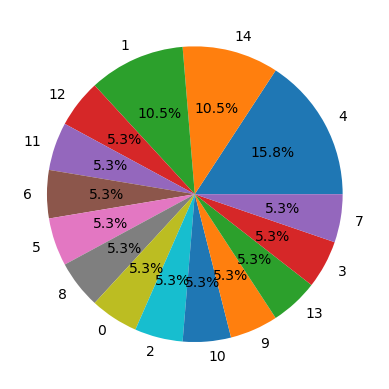

In [60]:
cluster_counts = dfHabr1['clustersSpectral'].value_counts()
plt.pie(cluster_counts.values, labels=cluster_counts.index, autopct='%1.1f%%')
plt.show()

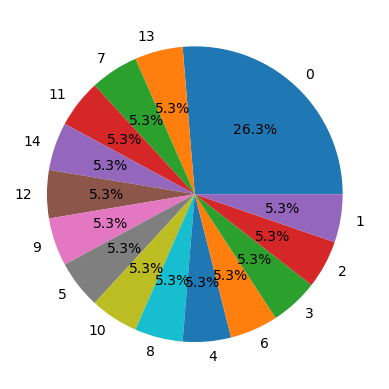

In [61]:
cluster_counts = dfHabr1['clustersAgglomerative'].value_counts()
plt.pie(cluster_counts.values, labels=cluster_counts.index, autopct='%1.1f%%')
plt.show()

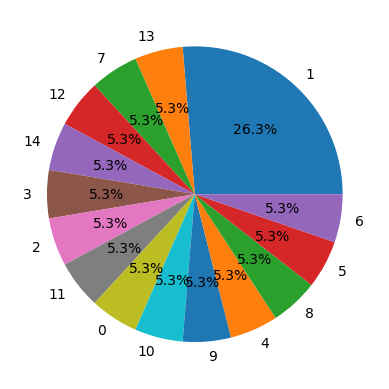

In [62]:
cluster_counts = dfHabr1['clustersKmeans'].value_counts()
plt.pie(cluster_counts.values, labels=cluster_counts.index, autopct='%1.1f%%')
plt.show()

In [63]:
prize = ['Государство и Общество','СМИ и массовые коммуникации','Образование и Кадры', 'Экономика и Бизнес', 'Путешествия по РФ', 'Наука, технологии и инновации', 'Здоровье и Отдых', 'Культурные проекты в сети', 'Народов много - Родина одна', 'Туризм и индустрия гостеприимства', 'Подкасты и цифровой контент']

In [64]:
a = (dfHabr1['clustersKmeans'] - dfHabr1['clustersKmeans'].mean()) / dfHabr1['clustersKmeans'].std()
a1 = (dfHabr1['clustersAgglomerative'] - dfHabr1['clustersAgglomerative'].mean()) / dfHabr1['clustersAgglomerative'].std()
a2 = (dfHabr1['clustersSpectral'] - dfHabr1['clustersSpectral'].mean()) / dfHabr1['clustersSpectral'].std()

In [65]:
data_norm_kmeans = a.values.reshape(-1, 1)
data_norm_agg = a1.values.reshape(-1, 1)
data_norm_spec = a2.values.reshape(-1, 1)

In [66]:
# оценка качества кластеризации с помощью индекса силуэта
silhouette_avg = silhouette_score(data_norm_kmeans, km.labels_)
print("Silhouette  score:", silhouette_avg)

Silhouette  score: 0.2631578947368421


In [67]:
# оценка качества кластеризации с помощью индекса силуэта
silhouette_avg = silhouette_score(data_norm_agg, agg.labels_)
print("Silhouette  score:", silhouette_avg)

Silhouette  score: 0.2631578947368421


In [68]:
# оценка качества кластеризации с помощью индекса силуэта
silhouette_avg = silhouette_score(data_norm_spec, spectral.labels_)
print("Silhouette  score:", silhouette_avg)

Silhouette  score: 0.3684210526315789


### 2.2 Тематическое моделирование

In [69]:
# создание модели LDA
lda_model = LatentDirichletAllocation(n_components=15, random_state=0)
lda_model.fit(count_matrix)

# вывод топ слов для каждой темы
for i, topic in enumerate(lda_model.components_):
    print(f"Topic {i}: {', '.join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: язык, платформа, отдел, платформенный, проблема, использовать, языковой, онлайн, обсуждать, драйвер
Topic 1: лидар, мочь, информация, алгоритм, объект, автомобиль, помощь, данные, система, позволять
Topic 2: количество, решение, эффективный, возможно, работа, являться, предыдущий, работать, никакой, результат
Topic 3: ошибка, команда, мочь, проблема, файл, проверять, попробовать, служба, сервер, помощь
Topic 4: анимация, создавать, элемент, использовать, движение, помощь, компонент, делать, проект, изображение
Topic 5: тест, тест кейс, кейс, регрессионный, история, тестирование, спринт, новый, пользовательский, пользовательский история
Topic 6: год, человек, млн, вид, становиться, продажа, весь, именно, образ, бог
Topic 7: балл, статья, сумма, номинация, технический, компания, весь, технический балл, блог, спасибо
Topic 8: дыра, чрной дыра, чрной, событие, вселенная, горизонт, горизонт событие, материя, мочь, время
Topic 9: система, плата, порт, разъем, озу, процессор, модуль,

In [70]:
len(lda_model.components_)

15

In [71]:
lda_model.components_

array([[0.06666667, 0.06666667, 0.06666667, ..., 0.06666667, 0.06666667,
        0.06666667],
       [0.06666667, 0.06666667, 0.06666667, ..., 0.06666667, 0.06666667,
        0.06666667],
       [0.06666667, 0.06666667, 0.06666667, ..., 0.06666667, 0.06666667,
        0.06666667],
       ...,
       [0.06666667, 0.06666667, 0.06666667, ..., 0.06666667, 0.06666667,
        0.06666667],
       [0.06666667, 0.06666667, 0.06666667, ..., 0.06666667, 0.06666667,
        0.06666667],
       [0.06666667, 0.06666667, 0.06666667, ..., 1.06666667, 1.06666667,
        1.06666667]])

In [72]:
# создание матрицы документ-термин
tfidf_vectorizer = TfidfVectorizer(stop_words=russian_stopwords)
tfidf_matrix = tfidf_vectorizer.fit_transform(dfHabr2)

In [73]:
type(tfidf_matrix)

scipy.sparse._csr.csr_matrix

In [74]:
tfidf_matrix.shape

(19, 4714)

In [75]:
# создание модели NMF
nmf_model = NMF(n_components=15, random_state=0)
nmf_model.fit(tfidf_matrix)

# вывод топ слов для каждой темы
for i, topic in enumerate(nmf_model.components_):
    print(f"Topic {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: левин, фаблаб, элизабет, студия, проект, движение, кен, игра, человек, робот
Topic 1: файл, конфигурационный, ошибка, команда, сервер, интерфейс, проверять, настройка, сетевой, конфигурация
Topic 2: реактивный, анимация, элемент, стрим, оператор, поток, событие, компонент, библиотека, использовать
Topic 3: плата, порт, разъем, озу, система, вплоть, модуль, ггц, ядро, характеристика
Topic 4: млн, продажа, квартал, год, динамика, рынок, доля, рост, поставщик, упасть
Topic 5: окрестность, клетка, сосед, правило, вес, радиус, нотация, взвешивать, параметр, конфигурация
Topic 6: тест, кейс, регрессионный, спринт, тестировщик, тестирование, пользовательский, история, устаревать, новый
Topic 7: дыра, чрной, горизонт, вселенная, материя, событие, сингулярность, белый, масса, пространство
Topic 8: геркон, игрушка, ребенок, магнит, контакт, корпус, ток, цветок, срабатывание, электроника
Topic 9: язык, платформенный, отдел, платформа, ельцин, зал, ильяс, письмо, онлайн, языковой
Topic 10

In [76]:
len(nmf_model.components_)

15

In [77]:
nmf_model.components_

array([[0.00000000e+00, 3.75169574e-02, 0.00000000e+00, ...,
        0.00000000e+00, 3.73533187e-02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.72103764e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.74844421e-03, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.05117364e-04, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.72608533e-05, 5.30618890e-02, ...,
        1.93759793e-04, 1.55716894e-02, 0.00000000e+00]])

In [78]:
# создание модели LSA
lsa_model = TruncatedSVD(n_components=15, random_state=0)
lsa_model.fit(tfidf_matrix)
# вывод топ слов для каждой темы
for i, topic in enumerate(lsa_model.components_):
    print(f"Topic {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: файл, мочь, команда, ошибка, анимация, конфигурационный, система, использовать, помощь, реактивный
Topic 1: файл, конфигурационный, ошибка, имя, интерфейс, команда, сервер, настройка, проверять, пространство
Topic 2: реактивный, анимация, элемент, стрим, оператор, событие, дыра, поток, библиотека, компонент
Topic 3: плата, сварка, ультразвуковой, порт, лидар, разъем, система, озу, алгоритм, вплоть
Topic 4: млн, продажа, имя, дыра, пространство, квартал, год, анонимный, чрной, порт
Topic 5: тест, кейс, реактивный, язык, регрессионный, стрим, платформенный, балл, спринт, отдел
Topic 6: язык, платформенный, отдел, платформа, трансляция, ильяс, письмо, ельцин, зал, обсуждать
Topic 7: дыра, тест, чрной, кейс, алгоритм, горизонт, вселенная, пространство, информация, материя
Topic 8: алгоритм, информация, стеганография, лидар, левин, чувствительный, человек, реактивный, контент, анимация
Topic 9: геркон, игрушка, реактивный, ребенок, магнит, стрим, контакт, файл, элемент, оператор
To

In [79]:
len(lsa_model.components_)

15

In [80]:
lsa_model.components_

array([[ 2.02794655e-03,  5.09339555e-03,  1.02007706e-02, ...,
         1.12855934e-02,  7.12285249e-03,  3.71078517e-03],
       [-9.19530758e-04, -5.79801403e-03, -1.70116377e-02, ...,
        -1.24267231e-02, -1.13120169e-02,  1.23614111e-03],
       [ 1.40415608e-03,  3.57456415e-03, -2.86364082e-03, ...,
        -6.35072887e-03,  8.98407289e-05,  2.39129991e-03],
       ...,
       [-2.87502559e-03, -6.32648468e-03, -1.15228933e-03, ...,
         2.63139796e-02, -7.28457151e-03,  5.23737592e-03],
       [-1.07037756e-03, -3.52754258e-03,  9.22553406e-03, ...,
         1.61022653e-02, -3.04974343e-04,  2.67363882e-03],
       [-1.79358509e-05, -8.80431638e-03,  4.27363049e-02, ...,
         1.62401063e-03,  2.91614177e-03, -3.52999113e-03]])

In [81]:
# создание модели LSA
lsa_model = TruncatedSVD(n_components=15, random_state=0)
lsa_model.fit(tfidf_matrix)
# вывод топ слов для каждой темы
for i, topic in enumerate(lsa_model.components_):
    print(f"Topic {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: файл, мочь, команда, ошибка, анимация, конфигурационный, система, использовать, помощь, реактивный
Topic 1: файл, конфигурационный, ошибка, имя, интерфейс, команда, сервер, настройка, проверять, пространство
Topic 2: реактивный, анимация, элемент, стрим, оператор, событие, дыра, поток, библиотека, компонент
Topic 3: плата, сварка, ультразвуковой, порт, лидар, разъем, система, озу, алгоритм, вплоть
Topic 4: млн, продажа, имя, дыра, пространство, квартал, год, анонимный, чрной, порт
Topic 5: тест, кейс, реактивный, язык, регрессионный, стрим, платформенный, балл, спринт, отдел
Topic 6: язык, платформенный, отдел, платформа, трансляция, ильяс, письмо, ельцин, зал, обсуждать
Topic 7: дыра, тест, чрной, кейс, алгоритм, горизонт, вселенная, пространство, информация, материя
Topic 8: алгоритм, информация, стеганография, лидар, левин, чувствительный, человек, реактивный, контент, анимация
Topic 9: геркон, игрушка, реактивный, ребенок, магнит, стрим, контакт, файл, элемент, оператор
To

In [82]:
pyLDAvis.enable_notebook()

In [83]:
# визуализация модели LDA
panel = pyLDAvis.sklearn.prepare(lda_model, count_matrix, vectorizer, mds='tsne')
panel

C:\Users\essww\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
13    -21.049028 -16.744314       1        1  14.110346
1      13.431363 -12.507946       2        1  13.931174
6      -2.728396 -27.877985       3        1  12.031943
11     -2.820207  -4.427669       4        1  10.335173
4       1.930696  34.883919       5        1   8.448482
14     13.860621  13.711804       6        1   8.233475
7      -4.365102  14.018684       7        1   7.665495
12    -24.220634   4.813831       8        1   7.557992
8      22.964674  33.552288       9        1   6.085190
3      26.451481   0.679813      10        1   5.295038
5     -19.696274  27.425346      11        1   3.558852
9      37.923256  18.945330      12        1   1.887169
0      18.233685 -33.629055      13        1   0.855135
2      34.939812 -19.877192      14        1   0.002268
10     47.477047  -1.332209      15        1   0.002268, topic_info=                 Term       Freq      Total Category  logprob  loglift
36228            файл  74.000000  74.000000  Default  30.0000  30.0000
28030      реактивный  70.000000  70.000000  Default  29.0000  29.0000
33202           стрим  56.000000  56.000000  Default  28.0000  28.0000
7055             дыра  37.000000  37.000000  Default  27.0000  27.0000
19215        оператор  55.000000  55.000000  Default  26.0000  26.0000
...               ...        ...        ...      ...      ...      ...
9008        изменение   0.000032   9.791576  Topic15 -10.5723  -1.9241
10006  инфраструктура   0.000032   1.657530  Topic15 -10.5723  -0.1479
10127   использование   0.000032  26.142476  Topic15 -10.5723  -2.9061
10200    использовать   0.000032  58.979197  Topic15 -10.5723  -3.7198
10874           канал   0.000032   8.822658  Topic15 -10.5723  -1.8199

[826 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
41         2  0.871381           авто
59         6  0.925067        автомат
90         2  0.959117     автомобиль
134        2  0.943465  автомобильный
148        2  0.924901     автономный
...      ...       ...            ...
38932      3  0.263264           язык
38932      7  0.263264           язык
38932     13  0.263264           язык
38949      2  0.643918       языковой
38989      3  0.950123       японский

[1520 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 2, 7, 12, 5, 15, 8, 13, 9, 4, 6, 10, 1, 3, 11])

In [84]:
# визуализация модели NMF
panel = pyLDAvis.sklearn.prepare(nmf_model, tfidf_matrix, tfidf_vectorizer, mds='tsne')
panel

C:\Users\essww\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\Users\essww\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
C:\Users\essww\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0       -1.044024   40.180260       1        1  12.509508
12     -34.821056   60.482491       2        1  11.729607
14     -66.061401   34.854309       3        1  10.448705
2       43.734367   17.870121       4        1   9.433697
1     -110.347153   44.113289       5        1   7.917127
8      -40.412121  107.507584       6        1   6.810468
10     -38.940884    6.733706       7        1   6.470713
11     -62.376968  -32.878536       8        1   6.406650
3      -18.186115  -43.432819       9        1   4.867055
9       31.618916  -31.270456      10        1   4.659329
5      -94.236908   -2.072626      11        1   4.505737
7       38.984417   64.247932      12        1   3.886837
13       2.417862   90.383118      13        1   3.867760
4       -0.143733   -0.335449      14        1   3.614723
6      -79.079895   81.039001      15        1   2.872083, topic_info=             Term      Freq     Total Category  logprob  loglift
4073         тест  0.000000  0.000000  Default  30.0000  30.0000
886          дыра  0.000000  0.000000  Default  29.0000  29.0000
2285  окрестность  0.000000  0.000000  Default  28.0000  28.0000
1798          млн  0.000000  0.000000  Default  27.0000  27.0000
4363         файл  0.000000  0.000000  Default  26.0000  26.0000
...           ...       ...       ...      ...      ...      ...
1140     избегать  0.034396  0.074596  Topic15  -5.2858   2.7760
559    выполнение  0.037605  0.118611  Topic15  -5.1967   2.4014
498         время  0.045581  0.418244  Topic15  -5.0043   1.3336
348          весь  0.043923  0.534875  Topic15  -5.0414   1.0505
1298       каждый  0.039196  0.371045  Topic15  -5.1552   1.3024

[1071 rows x 6 columns], token_table=      Topic      Freq              Term
term                                   
886      12  1.444898              дыра
1204     13  1.569401               имя
1466      5  1.927183  конфигурационный
1798     14  1.653108               млн
2285     11  1.549787       окрестность
3391      4  1.792100        реактивный
4073     15  1.262898              тест
4363      5  1.069626              файл, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 13, 15, 3, 2, 9, 11, 12, 4, 10, 6, 8, 14, 5, 7])

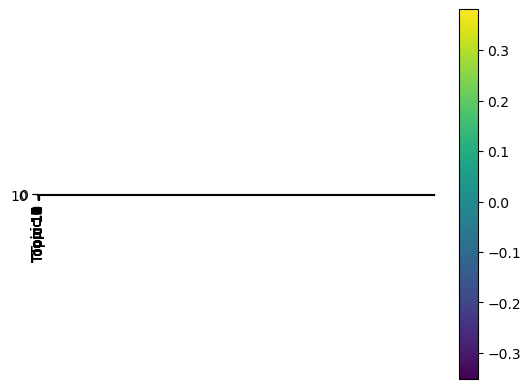

In [85]:
# визуализация модели LSA, к сожалению, через pyLDAvis невозможно вывести модель LSA
plt.imshow(lsa_model.components_, cmap='viridis', interpolation='none')
plt.colorbar()
plt.xticks(range(15), ['Topic ' + str(i) for i in range(15)], rotation=90)
plt.show()

1 - Архитекутра компьютера

2 - Технологии медицины

3 - GameDev

4 - Бизнес решение

5 - Интернет и связь

6 - 

7 - Беспилотники

8 -

9 - Языки программирования

10 - Сервера и ПО

11 - Блогинг

12 - Архитекутра компьютера

13 - СУБД

14 - Машинное обучение

15 - Электроника

сми

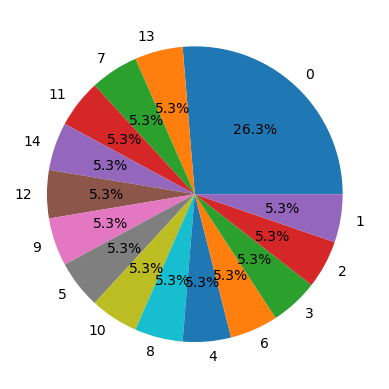

In [86]:
cluster_counts = dfHabr1['clustersAgglomerative'].value_counts()
plt.pie(cluster_counts.values, labels=cluster_counts.index, autopct='%1.1f%%')
plt.show()

In [87]:
print(dfHabr1.loc[dfHabr1['clustersAgglomerative'] == 0, 'keyword'])

1     ребёнок, геркон, игрушка, контакт, магнит, кор...
2     млн, продажа, год, квартал, пк, рынок, динамик...
6     система, плата, гб, порт, разъём, оз, процессо...
11    движение, который, проект, делать, свой, робот...
15    язык, наш, использовать, отдел, платформенный,...
Name: keyword, dtype: object


In [88]:
print(dfHabr1.loc[dfHabr1['clustersAgglomerative'] == 1, 'keyword'])

18    окрестность, правило, клетка, вес, сосед, ради...
Name: keyword, dtype: object


In [89]:
print(dfHabr1.loc[dfHabr1['clustersAgglomerative'] == 2, 'keyword'])

17    лидар, объект, автомобиль, система, беспилотны...
Name: keyword, dtype: object


In [90]:
print(dfHabr1.loc[dfHabr1['clustersAgglomerative'] == 3, 'keyword'])

16    балл, сумма, номинация, статья, технический, к...
Name: keyword, dtype: object


In [91]:
print(dfHabr1.loc[dfHabr1['clustersAgglomerative'] == 4, 'keyword'])

13    сварка, ультразвуковой, материал, который, нак...
Name: keyword, dtype: object


In [92]:
print(dfHabr1.loc[dfHabr1['clustersAgglomerative'] == 5, 'keyword'])

9    анимация, элемент, использовать, компонент, из...
Name: keyword, dtype: object


In [93]:
print(dfHabr1.loc[dfHabr1['clustersAgglomerative'] == 6, 'keyword'])

14    файл, конфигурационный, интерфейс, сетевой, на...
Name: keyword, dtype: object


In [94]:
print(dfHabr1.loc[dfHabr1['clustersAgglomerative'] == 7, 'keyword'])

3    дыра, чрной, событие, вселенная, чрный, горизо...
Name: keyword, dtype: object


In [95]:
print(dfHabr1.loc[dfHabr1['clustersAgglomerative'] == 8, 'keyword'])

12    тест, кейс, регрессионный, история, спринт, те...
Name: keyword, dtype: object


In [96]:
print(dfHabr1.loc[dfHabr1['clustersAgglomerative'] == 9, 'keyword'])

8    реактивный, стрим, оператор, поток, элемент, с...
Name: keyword, dtype: object


In [97]:
print(dfHabr1.loc[dfHabr1['clustersAgglomerative'] == 10, 'keyword'])

10    имя, пространство, связь, анонимный, функция, ...
Name: keyword, dtype: object


In [98]:
print(dfHabr1.loc[dfHabr1['clustersAgglomerative'] == 11, 'keyword'])

4    человек, год, вид, хуманизация, стать, бог, яп...
Name: keyword, dtype: object


In [99]:
print(dfHabr1.loc[dfHabr1['clustersAgglomerative'] == 12, 'keyword'])

7    ошибка, команда, проблема, файл, проверить, мо...
Name: keyword, dtype: object


In [100]:
print(dfHabr1.loc[dfHabr1['clustersAgglomerative'] == 13, 'keyword'])

0    алгоритм, информация, стеганография, контент, ...
Name: keyword, dtype: object


In [101]:
print(dfHabr1.loc[dfHabr1['clustersAgglomerative'] == 14, 'keyword'])

5    левин, который, игра, элизабет, студия, кен, ч...
Name: keyword, dtype: object


In [102]:
dfHabr1.head()

,TitleCompany,Description,Reiting,Categories,TextPostLemat,TextPostToken,bigram,trigram,keyword,clustersAgglomerative,clustersKmeans,clustersSpectral
0,RUVDS.com,VDS/VPS-хостинг. Скидка 15% по коду HABR15,2393.91,"Электроника для начинающих, Системное админист...",общий обзор новый алгоритм стеганография позво...,"[общий, обзор, новый, алгоритм, стеганография,...","[(общий, обзор), (обзор, новый), (новый, алгор...","[(общий, обзор, новый), (обзор, новый, алгорит...","алгоритм, информация, стеганография, контент, ...",13,13,12
1,Timeweb Cloud,Облачная платформа для разработчиков и бизнеса,1542.55,"DIY или Сделай сам, История IT",студенческий год родитель союз студент часто п...,"[студенческий, год, мой, родитель, союз, студе...","[(студенческий, год), (год, мой), (мой, родите...","[(студенческий, год, мой), (год, мой, родитель...","ребёнок, геркон, игрушка, контакт, магнит, кор...",0,1,14
2,Selectel,IT-инфраструктура для бизнеса,1935.27,"IT-компании, Производство и разработка электро...",явление называть именно обвал дело продажа жес...,"[другой, явление, назвать, именно, обвал, дело...","[(другой, явление), (явление, назвать), (назва...","[(другой, явление, назвать), (явление, назвать...","млн, продажа, год, квартал, пк, рынок, динамик...",0,1,14
3,RUVDS.com,VDS/VPS-хостинг. Скидка 15% по коду HABR15,2393.91,"Электроника для начинающих, Системное админист...",закон физика говорить обо весь возможный явлен...,"[закон, физика, говорить, мы, о, возможный, яв...","[(закон, физика), (физика, говорить), (говорит...","[(закон, физика, говорить), (физика, говорить,...","дыра, чрной, событие, вселенная, чрный, горизо...",7,7,11
4,RUVDS.com,VDS/VPS-хостинг. Скидка 15% по коду HABR15,2393.91,"Электроника для начинающих, Системное админист...",существовать нарисовать вид анимешной девушка ...,"[существовать, нарисовать, вид, анимешный, дев...","[(существовать, нарисовать), (нарисовать, вид)...","[(существовать, нарисовать, вид), (нарисовать,...","человек, год, вид, хуманизация, стать, бог, яп...",11,12,6


In [103]:
df = ['данные, метод, система, изменение, цепочка, вакансия, сотрудник, диск, создание, канал',
'игра, человек, работа, дать, файл, статья, сообщение, создать, конфигурация, настройка',
'файл, система, проект, пакет, приложение, мочь, мониторинг, проблема, программа, библиотека',
'схема, значение, компания, запрос, код, сигнал, переменный, инстанс, кнопка, кнопка текст',
'функция, данные, время, использовать, пример, игра, ресурс, база, клиент, компьютер',
'устройство, время, год, работать, уровень, пользователь, питание, пк, рабочий, плата',
'использовать, язык, мочь, данные, разработчик, год, работать, играть, поиск программа, приложение станция',
'мочь, кластер, коммутатор, приложение, каждый, команда, уровень, инфраструктура, следующий, канал',
'год, система, стать, изображение, обучение, ресурс, человек, безопасность, инфраструктура, результат',
'сервер, функция, часть, переменный, замыкание, приложение, класс, клиент, пользователь, тест',
'код, год, процессор, использовать, обучение, доступ, класс, ия, безопасность, название',
'год, поле, делать, класс, хабра, пользователь, автор, технический, первый, каждый',
'использовать, новый, работать, пользователь, сеть, событие, интерфейс, тест, адрес, команда',
'работа, устройство, система, объект, значение библиотека сериализатор, десериализация, сериализация результат использование, сериализация результат, сериализация, сериализатор сериализация результат',
'запрос, метрика, система, например, сша, пк, ресурс, слот, снимок, порт система']

In [104]:
dfCosinTest = pd.DataFrame({'texts': df})

In [105]:
find_nearest_to = str(dfHabr1.loc[dfHabr1['clustersAgglomerative'] == 15, 'keyword'])

In [106]:
# формирование весов tf-idf
tfidf = TfidfVectorizer()
mx_tf = tfidf.fit_transform(df)
new_entry = tfidf.transform([find_nearest_to])

In [107]:
type(mx_tf)

scipy.sparse._csr.csr_matrix

In [108]:
sdf = pd.DataFrame.sparse.from_spmatrix(mx_tf)
sdf

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.33771,0.000000,0.000000,0.261695,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.33771,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.333037,...,0.000000,0.000000,0.000000,0.289187,0.000000,0.000000,0.00000,0.000000,0.289187,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.311519,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.311519,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.360132,0.000000,0.000000,0.00000,0.312714,0.000000,0.279070,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.312714,0.000000,0.00000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.316570,0.234509,0.000000,0.000000,...,0.000000,0.316570,0.316570,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.214939,0.258936,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.334149
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.309646,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.323653,0.000000,0.00000,0.000000,0.239756,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.323653,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.314907,0.000000,0.00000,0.362658,0.000000,0.000000


In [109]:
cosine_similarity(mx_tf)

array([[1.        , 0.        , 0.05012935, 0.        , 0.07303129,
        0.        , 0.06776233, 0.09080196, 0.05208198, 0.        ,
        0.        , 0.        , 0.        , 0.02424497, 0.08943761],
       [0.        , 1.        , 0.09008711, 0.        , 0.09043272,
        0.        , 0.        , 0.        , 0.09359617, 0.        ,
        0.        , 0.        , 0.        , 0.04357047, 0.        ],
       [0.05012935, 0.09008711, 1.        , 0.        , 0.        ,
        0.        , 0.22152497, 0.13994754, 0.05532766, 0.06419857,
        0.        , 0.        , 0.        , 0.07269095, 0.09501124],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.07888394,
        0.07803503, 0.        , 0.        , 0.0377415 , 0.06961259],
       [0.07303129, 0.09043272, 0.        , 0.        , 1.        ,
        0.09899591, 0.13164018, 0.        , 0.08060448, 0.19695175,
        0.06375134, 0.        , 0.06245583, 

In [110]:
new_entry = tfidf.transform([find_nearest_to])
pd.DataFrame.sparse.from_spmatrix(new_entry)

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
cosine_similarities = cosine_similarity(new_entry, mx_tf).flatten()
cosine_similarities

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [112]:
# запишем все попарные результаты сравнений
dfCosinTest['cos_similarities'] = cosine_similarities
# и отсортируем по убыванию (т.к. cos(0)=1)
dfCosinTest = dfCosinTest.sort_values(by=['cos_similarities'], ascending=[0])
dfCosinTest

,texts,cos_similarities
0,"данные, метод, система, изменение, цепочка, ва...",0.0
1,"игра, человек, работа, дать, файл, статья, соо...",0.0
2,"файл, система, проект, пакет, приложение, мочь...",0.0
3,"схема, значение, компания, запрос, код, сигнал...",0.0
4,"функция, данные, время, использовать, пример, ...",0.0
5,"устройство, время, год, работать, уровень, пол...",0.0
6,"использовать, язык, мочь, данные, разработчик,...",0.0
7,"мочь, кластер, коммутатор, приложение, каждый,...",0.0
8,"год, система, стать, изображение, обучение, ре...",0.0
9,"сервер, функция, часть, переменный, замыкание,...",0.0


0 = 14

1 = 15

2 = 6

3 = 2

4 = 3

5 = 5

6 = 4

7 = 8

8 = 1

9 = 13

10 = 7

11 = 9

12 = 10

13 = 11

14 = 12

### 2.4 Разведочный анализ

In [113]:
X = dfHabr1['keyword']
y = dfHabr1['clustersAgglomerative']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [115]:
my_tags = dfHabr1['clustersKmeans'].unique()
my_tags

array([13,  1,  7, 12, 14,  3,  2, 11,  0, 10,  9,  4,  8,  5,  6],
      dtype=int64)

In [116]:
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])

NameError: name 'TfidfTransformer' is not defined

In [ ]:
%%time
nb.fit(X_train, y_train)

In [ ]:
%%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

In [ ]:
y_pred[0]

In [ ]:
print(X_test[0], y_test[0], y_pred[0])

In [ ]:
my_tags

In [ ]:
from sklearn.metrics import accuracy_score

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])

In [ ]:
%%time
sgd.fit(X_train, y_train)

In [ ]:
%%time
y_pred = sgd.predict(X_test)

In [ ]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])

In [ ]:
%%time
logreg.fit(X_train, y_train)

In [ ]:
%%time
y_pred = logreg.predict(X_test)

In [ ]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

In [ ]:
econ_text = 'время неумолимо бежать вперед выходить новый гаджет постепенно заменять старый превращать тыква хороший случай тапочек звонок смартфон становиться практически одинаковый дисплей весь площадь передний панель полный отсутствие аппаратный кнопка беспроводной зарядка это здорово хотеться взять рука старый необычный наш время qwerty смартфон попытаться использовать основной цена мочь приятно удивлять бу девайс купить несколько сотня рубль проблема клиент приложение версия android безбожно устаревать давно работать желание воскрешать старый девайс превыше потребительский качество приходить мысль почему написать ноль свой клиент популярный приложение вк музыка youtube трекинг посылка садиться писать необходимый повседневный жизнь приложение ноль голый api android либо фреймворков appcompat получаться это узнавать статья мотивация самый дело копаться старый девайса пытаться находить применение это очень интересный затягивать дело зачастую попытка оживлять девайс заключаться прочтение большой количество мануал документация копание терминал компиляция загрузчик ядро подобный занятие интересный весь уровень хардварный системный прикладной пользовательский предыдущий статья моддиль девайса весь уровень ремонтировать железный болячка написать несколько статья системный моддинг компиляция загрузчик неизвестный китайский устройство узнавать пользовательский опыт установка готовый кастомный прошивка летний устройство сегодняшний день обходить прикладной уровень моддинг устройство т е написание самый обычный повседневный программа который сложно представлять жизнь современный человек время выход первый galaxy s год многие сутки красноглазить java версия аська сидеть вконтакте большинство заглядывать смартфон каждый пара минута проверка нотификация год смартфонный жизнь становиться похожий который привыкать соц сеть мессенджер пушить потоковый видео многие успевать привязываться жизнь конкретно самый девайса год давно миновать тенденция разработка приложение кардинальный поменяться учитывать многий читатель любить выбрасывать девайса мусорка правильно делать наверняка регулярно заглядывать полочка свой пыльный бывший гаджет рассматривать теплота сожаление понимать время проходить проходить посмотреть навык огромный мотивация программер мочь многое число запиливать весь самый необходимый приложение давно лелеять идея подумывать реализовать весь свой жизнь писать c практически щупать api android ui фрейморк день очень сильно зачесываться рука написать эдакий причем сразу весьма серьезный весь устройство год самый молодой являться реплика lumia который успевать замоддить рождаться идея написать клиент youtube вк трекинг придача б выделять неделя время должный успевать заканчивать пусть сыроватый вполне юзабельный клиент любить сервис начинать думать планирование написание приложение старый мобильный ос любой платформа требовать планирование работать учет ограничение целевой платформа сразу несколько ограничение раззадоривать пыл большинство свой старый версия android работать одноядерный чипсет значит лимитировать многопоточность никакой работа ui поток кроме обновление интерфейс поскольку первый версия система интерфейс менее отзывчивый свежий нужно сохранять баланс функционал симпатичность скорость работа приложение должный оптимально работать следующий условие мб озу который свободно средний мб сбер привет вылет гб озу ядро мгц видео ядро уровень mali malii негусто сходить второй ограничение становиться тотальный устаревание корневой сертификат многие знать просто мобильный система обновлять поэтому приходиться идти хаки делать сервер реле который преобразовывать трафик https http просто отключать проверка верификация ssl это кейс api vk решать отдельный сервер реле который отправлять запрос сервер вк обратно возвращать обычный результат json третий ограничение становиться android targetsdk android cupcake никакой appcompat кушать драгоценный свободный место никакой сервис google год чистый api система условие год назад писаться первый приложение android раздобывать лепешка расшибаться портировать свой приложение гордость сказать приложение работать android устройство полный энтузиазм садиться писать код основной часть статья решать поделить каждый приложение отдельно конкретный объяснение делать хотеться заранее сказать особо давно писать android зато писать winforms поэтому решение мочь показываться странный некоторый решение обусловливать версия android например нотификация первый версия android notification builder notification похожий структура приложение писать java вконтакте первый дело начинать писать клиент вк сразу определяться свой хотелок который весьма скромный возможность листать диалог читать сообщение отправлять полный поддержка qwerty клавиатура т е отправка enter плюс возможность слушать музыка ограничение вк бочка кой случай гнать просто публичный api ограничение хотя здорово снова хотеться почувствовать эмоция который ощущать прослушивание музыка школяр свой первый android смартфон год прилетать школа слушать плейлист практически девайса идентичный железо версия android помнить пользоваться прелесть многозадачность android g интернет g чипсет просто поддерживать песня слушать поставлять второй качаться пока песня доигрывать второй скачаться итак хотелка выбирать пора начинать писать приложение дебаг устройство galaxy s android jb китайский galaxy s mini i android фото высоко samsung galaxy s i android эмулятор kitkat android studio уметь проблема собирать приложение вплоть версия android последний build tools target sdk главное выкидывать appcompat androidx юнит тест build gradle либо проблема цеплять устройство adb отладчик проблема работать первый дело начинать писать активитя полноэкранный форма терминология android экран приложение диалог должный секунда подгружать данные строить морда весь суть весь код клиент получение ответ api вк разбор json датасет визуализация датасет экран это вводить объект vk который делать асинхронный запрос сервер оборачивать работа сервер реле парсить json vkobjectprocessor это скоро отрефакториться vkdataset поздно архитектура приложение получаться довольно простой примитивный старт активитя авторизация проверять данный приложение persiststorage наличие api токен отсутствие запрашивать авторизация это становиться классический среди различный самопальный клиент клиент прикидываться официальный приложение вк это использоваться связка app id app secret приложение вконтакте android авторизация приложение перенаправлять страница диалог поскольку пуша лонгполлинг метод обновление оставаться заданный интервал это handler который сечь брать список диалог сервер проверять обновляться данные обновлять датасет отправлять сигнал обновление интерфейс который построить listview кроме кеш аватарка точно распаралелленый несколько поток загружать данный момент превьюшка храниться хэшмап это сообщение реализовать схожий образ данный момент возможность горячий подгрузка сообщение сверху поэтому обновляться последний сообщение скоп сразу шустро весь это работать вполне неплохо основной процессорный время уходить разбор тяжелый json отчасти вино вк мало кастрировать функционал gethistory последний версия api возможность возвращать поле который нужный поступать аудиозапись музыка api настоящий заноза разработчик клиент который приходиться подолбаться правда недолго основной запрос сервер реле почему сделать музыка суть обход простой сгенерировать специальный api токен свободно обращаться метод связывать музыка необходимость притворяться официальный клиент подписывать запрос md ключ примитивный php скрипт предоставлять возможность позволять получать доступ база музыка вк однако ограничение типичный пользователь должный открытый аудиозапись php audiorelay for minivk c monobogdan token censored function vkrequest request global token curl curl init https api vk com method request access token token v curl setopt curl curlopt returntransfer true return curl exec curl function audioget uid get uid return vkrequest audio get owner id uid count function audiosearch query get query return vkrequest audio search q query count function audiogetdetails id get id return vkrequest audio getbyid audios id function audiostream url get url curl curl init urldecode url curl setopt curl curlopt returntransfer true return curl exec curl actions array actions get audioget actions search audiosearch actions getdetails audiogetdetails actions stream audiostream if isset get act act get act if isset actions act exit actions act exit internal error итог получаться рабочий плеер поиск музыка добавлять трек производительность оставаться отличный ссориться ребята вк хотеть поэтому добавлять возможность качать трек пока становиться стоить дружелюбный разработчик кастомный клиент получать итог довольно простенький клиент вк который практически потреблять озу шустро работать хватать куча различный фич минимум прсомотр лента стена успеться проект интересный продолжать наращивать фишечка потихоньку близко релиз слегка причесывать клиент добавлять вкшный дизайн приделывать анимированный боковой меню animation помнить youtube разработка клиент youtube свой особенность первый отличие клиент вк видео реле просто загружать слишком трафик второй youtube отдавать видео формат который поддерживать старый устройство основной это h p сожаление потоковый видео софтовый декодирование укладывать лопатка большинство одноядерник год ситуация осложняться videoview стандартный плеер весь смартфон который отлаживать приложение уметь игнорировать ошибка ssl просто валиться ошибка приходиться придумывать видосик хотеться смотреть крутой amoled дисплей galaxy s посидеть подумать придумывать поиск база youtube получение информация прямой ссылка видео решать использовать альтернативный фронтэнд youtube который называться invidous api крутой штука свой api который распределять пул токен ютуб отдавать ответ вид json формат запрос очень простой url инстанс invidous api v метод например search q test region ru hl ru выдавать результат поиск test российский регион очень удобно invidous отдельный сервис целый сеть т н инстанс хотеть юзай поскольку большинство инстанс прятаться свежий сертификат приходиться идти довольно известный костыль отключение верификация хостнейм httpurlconnection public static void disablesslcertificatechecking trustmanager trustallcerts new trustmanager new x trustmanager public x certificate getacceptedissuers return null override public void checkclienttrusted x certificate arg string arg throws certificateexception not implemented override public void checkservertrusted x certificate arg string arg throws certificateexception not implemented try sslcontext sc sslcontext getinstance tls sc init null trustallcerts new java security securerandom httpsurlconnection setdefaultsslsocketfactory sc getsocketfactory httpsurlconnection setdefaulthostnameverifier new hostnameverifier override public boolean verify string hostname sslsession session return true catch keymanagementexception e e printstacktrace catch nosuchalgorithmexception e e printstacktrace поскольку возможность воспроизводить потоковый видео онлайн решать просто предварительно загружать собственный менеджер закачка возможность последующий очистка кеш поскольку устройство p качество нужный выбирать p p mp avc кодек среднее ролик минута весить около мегабайт hsdpa загрузка подобный видео занимать около минута подождать закинуть тестовый версия беседа любитель ретро мобилка человек восторг поскольку invidous отчасти строиться анонимность авторизация однако свой задача посмотреть видосик выполнять нормально поэтому весь ui приложение поделить вкладка тренд популярный история поиск подписка история реализовывать сторона клиент некоторые подход показываться плюс однако минимальный задел клиент мочь смотреть видео скачать приложение бэкэнд полностью открытый исходный код доступный лицензия gplv следить статус проект github последний версия скачать релиз проект текущий хотеться портировать android несмотря приложение целое иметь targetsdk оно работать отказываться android слегка поменяться бинарный формат xml разметка приложение старый система вылетать исключение это решать eclipse adt зуб импортировать проект вперед кроме экспериментировать попытка сильно уменьшать нагрузка сеть процессор путем облегчение датасет json вк весить среднее кб который ядерный чипсет частота мгц мочь долго жевать негативно сказываться ui примитивный keyvalue формат который содержать нужный поле умещаться кб текстовый вид благодаря свой примитивность весь парсинг substring indexof поиск ключ хешмап налегать процессор благодаря наработка запиливать примитивный клиент вкшечка j me целое сделать единый формат датасет мессенджер бэкэнд реализовывать угодно telegram вк личный сообщение хабер платформа делать морда заводить современный мессенджер sailfish j me symbian winmobile практически пот кровь полный адаптация кнопочный управление клиент проблема писать сообщение любой клавиатура число qwerty однако основной интерфейс полностью адаптировать кнопка требовать выполнение некоторый действие палец заключение получаться вполне неплохо приложение кой сыроватый явно дотягивать функционал большой версия кое таки выигрывать легкий быстрый самый главное мочь продлять жизнь любимый девайса считать это классно средний потребление озу оба клиент мб вес apk кб момент выход статья значить писать голый api модный фреймворков остальной функционал кой android продолжать неплохо работать наш время например dlna стриминг дом e mail клиент банкинг смска уверенный это покрывать потребность большинство пользователь это называть старый смартфон бесполезный писать статья цель показывать старый девайса отнюдь тыква щепотка энтузиазм глаз любовь гаджет заодно поделиться свой приложение часто комментарий писать хотеть пользоваться свой смартфон далеко устаревать версия android считать ждать ваш мнение комментарий зарегистрировать пользователь мочь участвовать опрос входить пожалуйста старенький девайс появляться второй жизнь определенно запланировать устаревание продолжать жить неюзабельный вокруг прыгать проголосовать пользователь воздерживаться пользователь зарегистрировать пользователь мочь участвовать опрос входить пожалуйста полезно развивать приложение старый система развивать это нужный пустой трата время делать модный приложенька флаттер проголосовать пользователь воздерживаться пользователь  \n'

In [ ]:
econ_text = remove_multiple_spaces(remove_numbers(remove_punctuation(econ_text.lower())))


In [ ]:
%%time
econ_text = lemmatize(econ_text)

In [ ]:
ect_pred = nb.predict([econ_text])
ect_pred